<a href="https://colab.research.google.com/github/jp121412/Spotify_TCS/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**track_name:** Name of the song
**artist(s)_name**: Name of the artist(s) of the song
**artist_count:** Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song


Potential Use Cases

Music analysis: Explore patterns in audio features to understand trends and preferences in popular songs.
Platform comparison: Compare the song's popularity across different music platforms.
Artist impact: Analyze how artist involvement and attributes relate to a song's success.
Temporal trends: Identify any shifts in music attributes and preferences over time.
Cross-platform presence: Investigate how songs perform across different streaming ser

In [49]:
url = 'https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [51]:
# Install dependencies as needed:
# !pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "spotify-2023.csv"

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    'nelgiriyewithana/top-spotify-songs-2023',
    file_path,
    pandas_kwargs={'encoding': 'ISO-8859-1'}
)

print("First 5 records:", df.head())

First 5 records:                             track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  1413817

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
# creating the dataframe with the low Kaggle database
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [54]:
# checking the number of rows and columns
df.shape

(953, 24)

In [55]:
# creating the function to generate the dataframe metadata
def generate_metadata(dataframe):
  metadata = pd.DataFrame({
        'variable_name': dataframe.columns,
        'type': dataframe.dtypes,
        'qt_null': dataframe.isnull().sum(),
        'percent_null': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinality': dataframe.nunique(),
    })

  metadata = metadata.sort_values(by='percent_null', ascending=False)
  metadata = metadata.reset_index(drop=True)

  return metadata

In [56]:
generate_metadata(df)

,variable_name,type,qt_null,percent_null,cardinality
0,key,object,95,10,11
1,in_shazam_charts,object,50,5,198
2,track_name,object,0,0,943
3,artist(s)_name,object,0,0,645
4,released_month,int64,0,0,12
5,released_day,int64,0,0,31
6,artist_count,int64,0,0,8
7,released_year,int64,0,0,50
8,in_spotify_charts,int64,0,0,82
9,in_spotify_playlists,int64,0,0,879


In [57]:
# checking the unique values of the streams column
df.streams.unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [58]:
# checking the line where we have this error
df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [59]:
# replacing the value in the dataframe
df.loc[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', 'streams'] = 314000000

In [60]:
# checking if the value is still in the dataframe
df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [61]:
# transforming the column 'streams' into an integer
df['streams'] = df['streams'].astype(int)

In [62]:
# checking the type of the 'streams' column
df['streams'].dtypes

dtype('int64')

In [63]:
# transforming the 'in_deezer_playlists' column into a number
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').astype('Int64')
df['in_deezer_playlists'].dtypes

Int64Dtype()

In [64]:
# transforming the column 'in_shazam_charts' into numeric
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce').astype('Int64')
df['in_shazam_charts'].dtypes

Int64Dtype()

In [65]:
# Creating a column with the complete date
df['data'] = pd.to_datetime(df.rename(columns={
    'released_year': 'year',
    'released_month': 'month',
    'released_day': 'day'
})[['year', 'month', 'day']])

In [66]:
# renaming the date column
df = df.rename(columns={'data': 'release_date'})
df['release_date']

,release_date
0,2023-07-14
1,2023-03-23
2,2023-06-30
3,2019-08-23
4,2023-05-18
...,...
948,2022-11-03
949,2022-10-21
950,2022-11-03
951,2022-10-20


In [67]:
# setting the format of the numbers so that they are not abbreviated
pd.set_option('display.float_format', '{:.0f}'.format)

In [68]:
df.describe().round(2)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,953,953,953,953,953,953,953,953,953,874,...,896,953,953,953,953,953,953,953,953,953
mean,2,2018,6,14,5200,12,513927417,68,52,110,...,51,123,67,51,64,27,2,18,10,2018-09-10 05:09:45.519412480
min,1,1930,1,1,31,0,2762,0,0,0,...,0,65,23,4,9,0,0,3,2,1930-01-01 00:00:00
25%,1,2020,3,6,875,0,141720999,13,7,12,...,0,100,57,32,53,6,0,10,4,2020-06-28 00:00:00
50%,1,2022,6,13,2224,3,290833204,34,38,36,...,2,121,69,51,66,18,0,12,6,2022-04-08 00:00:00
75%,2,2022,9,22,5542,16,673801126,88,87,110,...,36,140,78,70,77,43,0,24,11,2022-11-04 00:00:00
max,8,2023,12,31,52898,147,3703895074,672,275,974,...,953,206,96,97,97,97,91,97,64,2023-07-14 00:00:00
std,1,11,4,9,7898,20,566596243,86,51,179,...,126,28,15,23,17,26,8,14,10,NaN


In [69]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [70]:
# replacing null values with 'NA'
df['key'] = df['key'].fillna('NA')
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [71]:
# checking the number of nulls
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [72]:
# creating a function to create boxplots
def boxplots (dataframe):
  # selecting only the numeric columns
  numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

  # defining the number of rows based on the number of numeric columns
  nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

  # creating the graphics panel
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

  # adjusting the layout
  plt.tight_layout(pad = 4)

  # choosing the color palette
  sns.set_style("whitegrid")

  # plotting the boxplot of each column
  for i, column in enumerate(numeric_columns):
      sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color='green')
      axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
      axes[i//3, i%3].set_ylabel('')

  # removing empty graphics (if any)
  for j in range(i+1, nrows * 3):
    fig.delaxes(axes.flatten()[j])

  # adding a main title to the panel
  fig.suptitle("Descriptive analysis - Boxplots", fontsize=20, fontweight='bold', y=1.00)

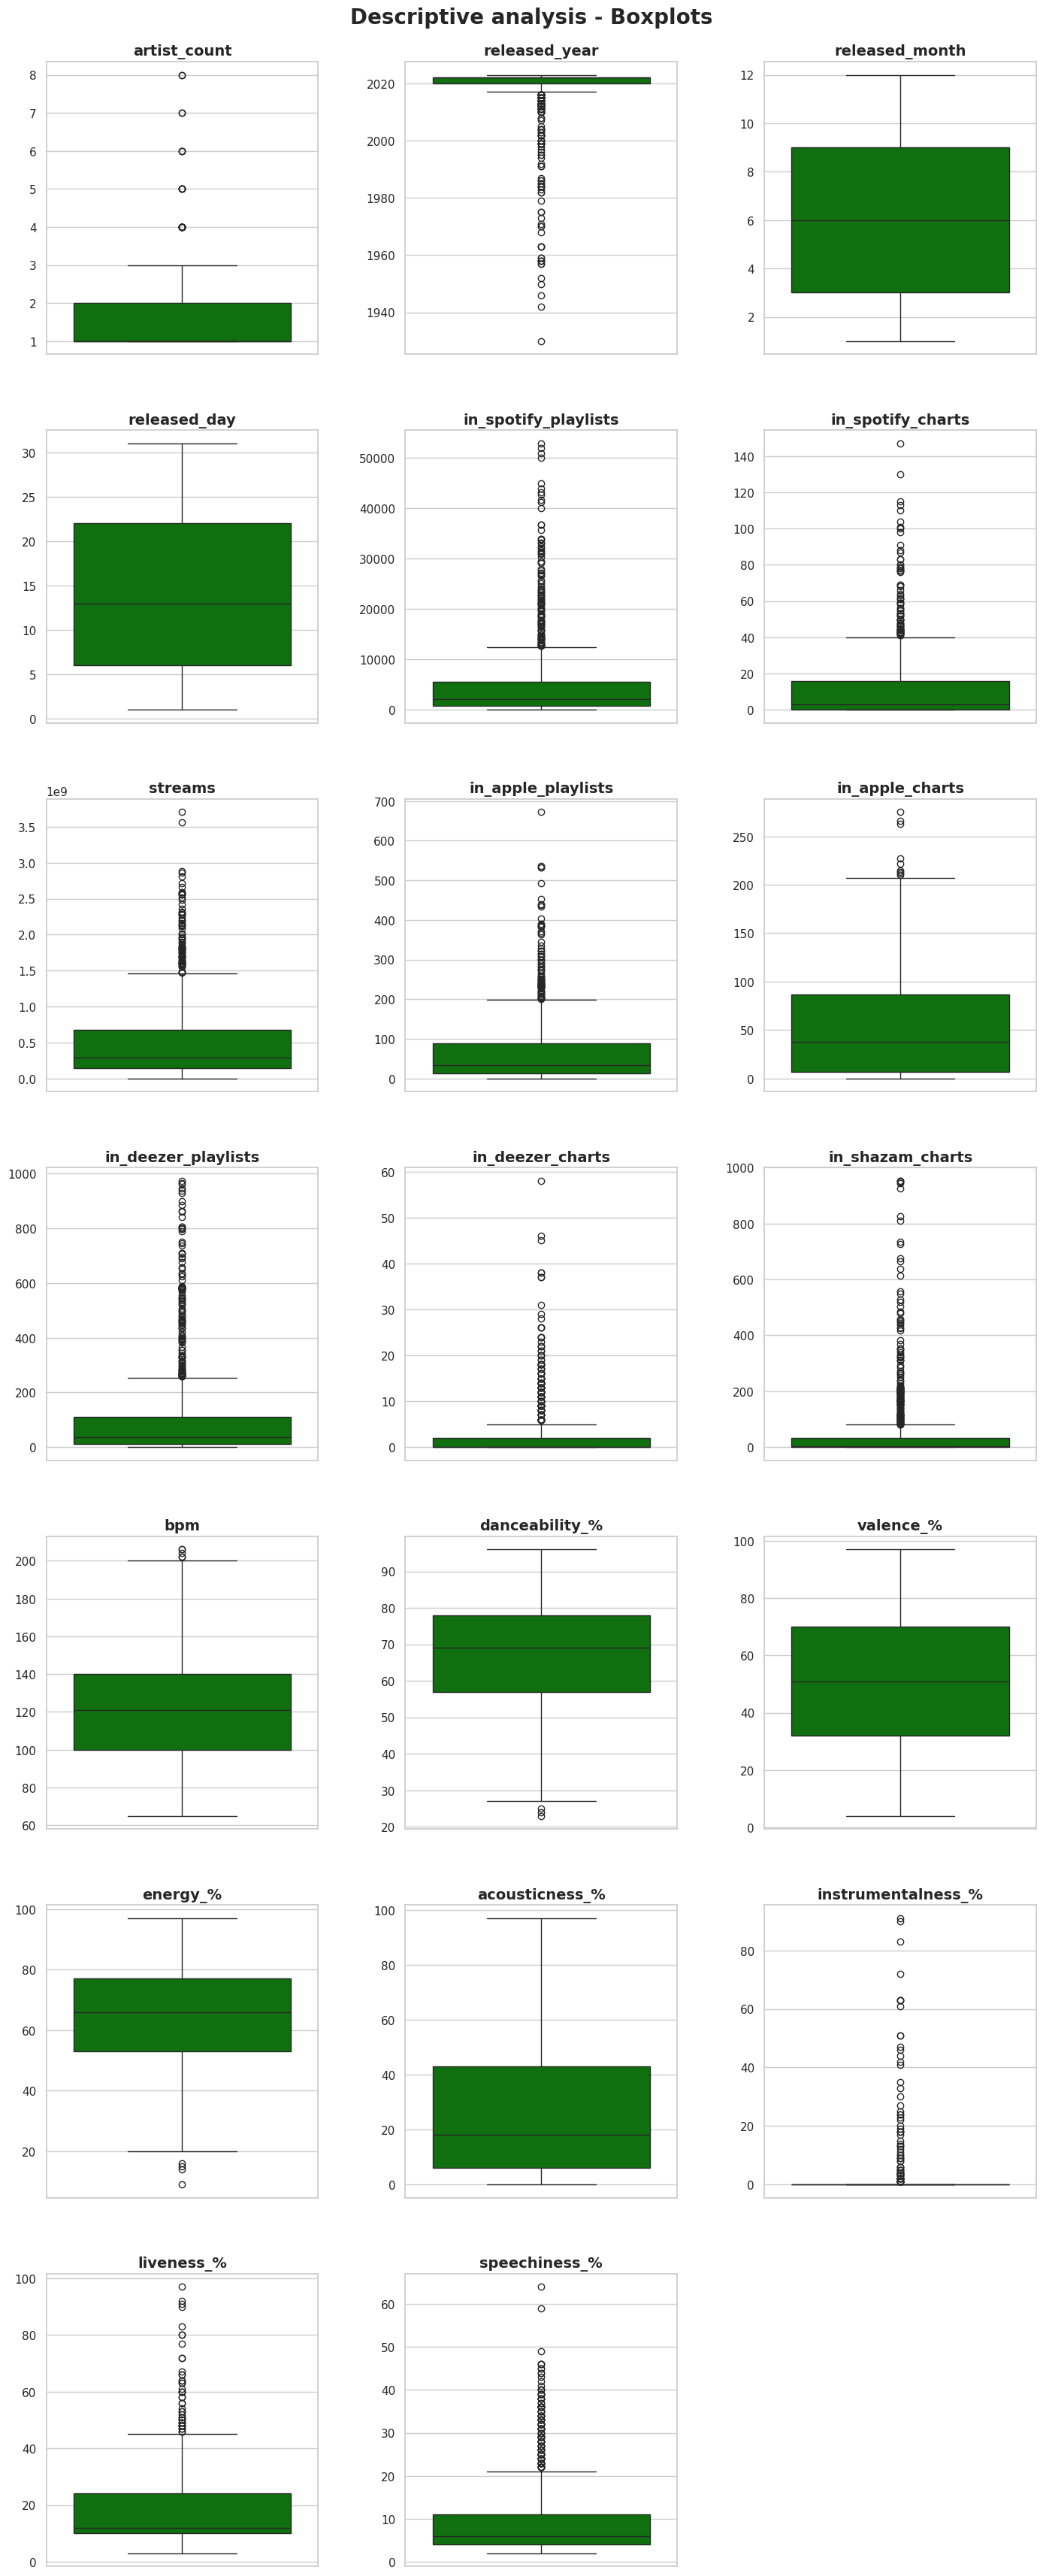

In [73]:
boxplots(df)

In [74]:
def histograms_var_num(dataframe):
  """
  Function to generate histograms of the numeric variables of a DataFrame using the KDE (Kernel Density Estimation) curve as a correction.

  Args:
      dataframe: DataFrame containing the numeric variables.
  """
  # selecting the numeric columns
  numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

  # defining the number of rows
  nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

  # creating the graphics panel
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

  # adjusting the layout
  plt.tight_layout(pad=4)

  # setting the style and color palette
  sns.set_style('whitegrid')

  # plotting the histograms with KDE
  for i, column in enumerate(numeric_columns):
    sns.histplot(data=dataframe, x=dataframe[column], kde=True, ax=axes[i//3, i%3], color='green', bins = 30)
    axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    axes[i//3, i%3].set_ylabel('Frequency')
    axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

  # removing empty graphs (if any)
  for j in range(i+1, nrows * 3):
    fig.delaxes(axes.flatten()[j])

  # adding a title to the overall image
  fig.suptitle("Descriptive analysis - Histograms", fontsize=20, fontweight='bold', y=1.00)

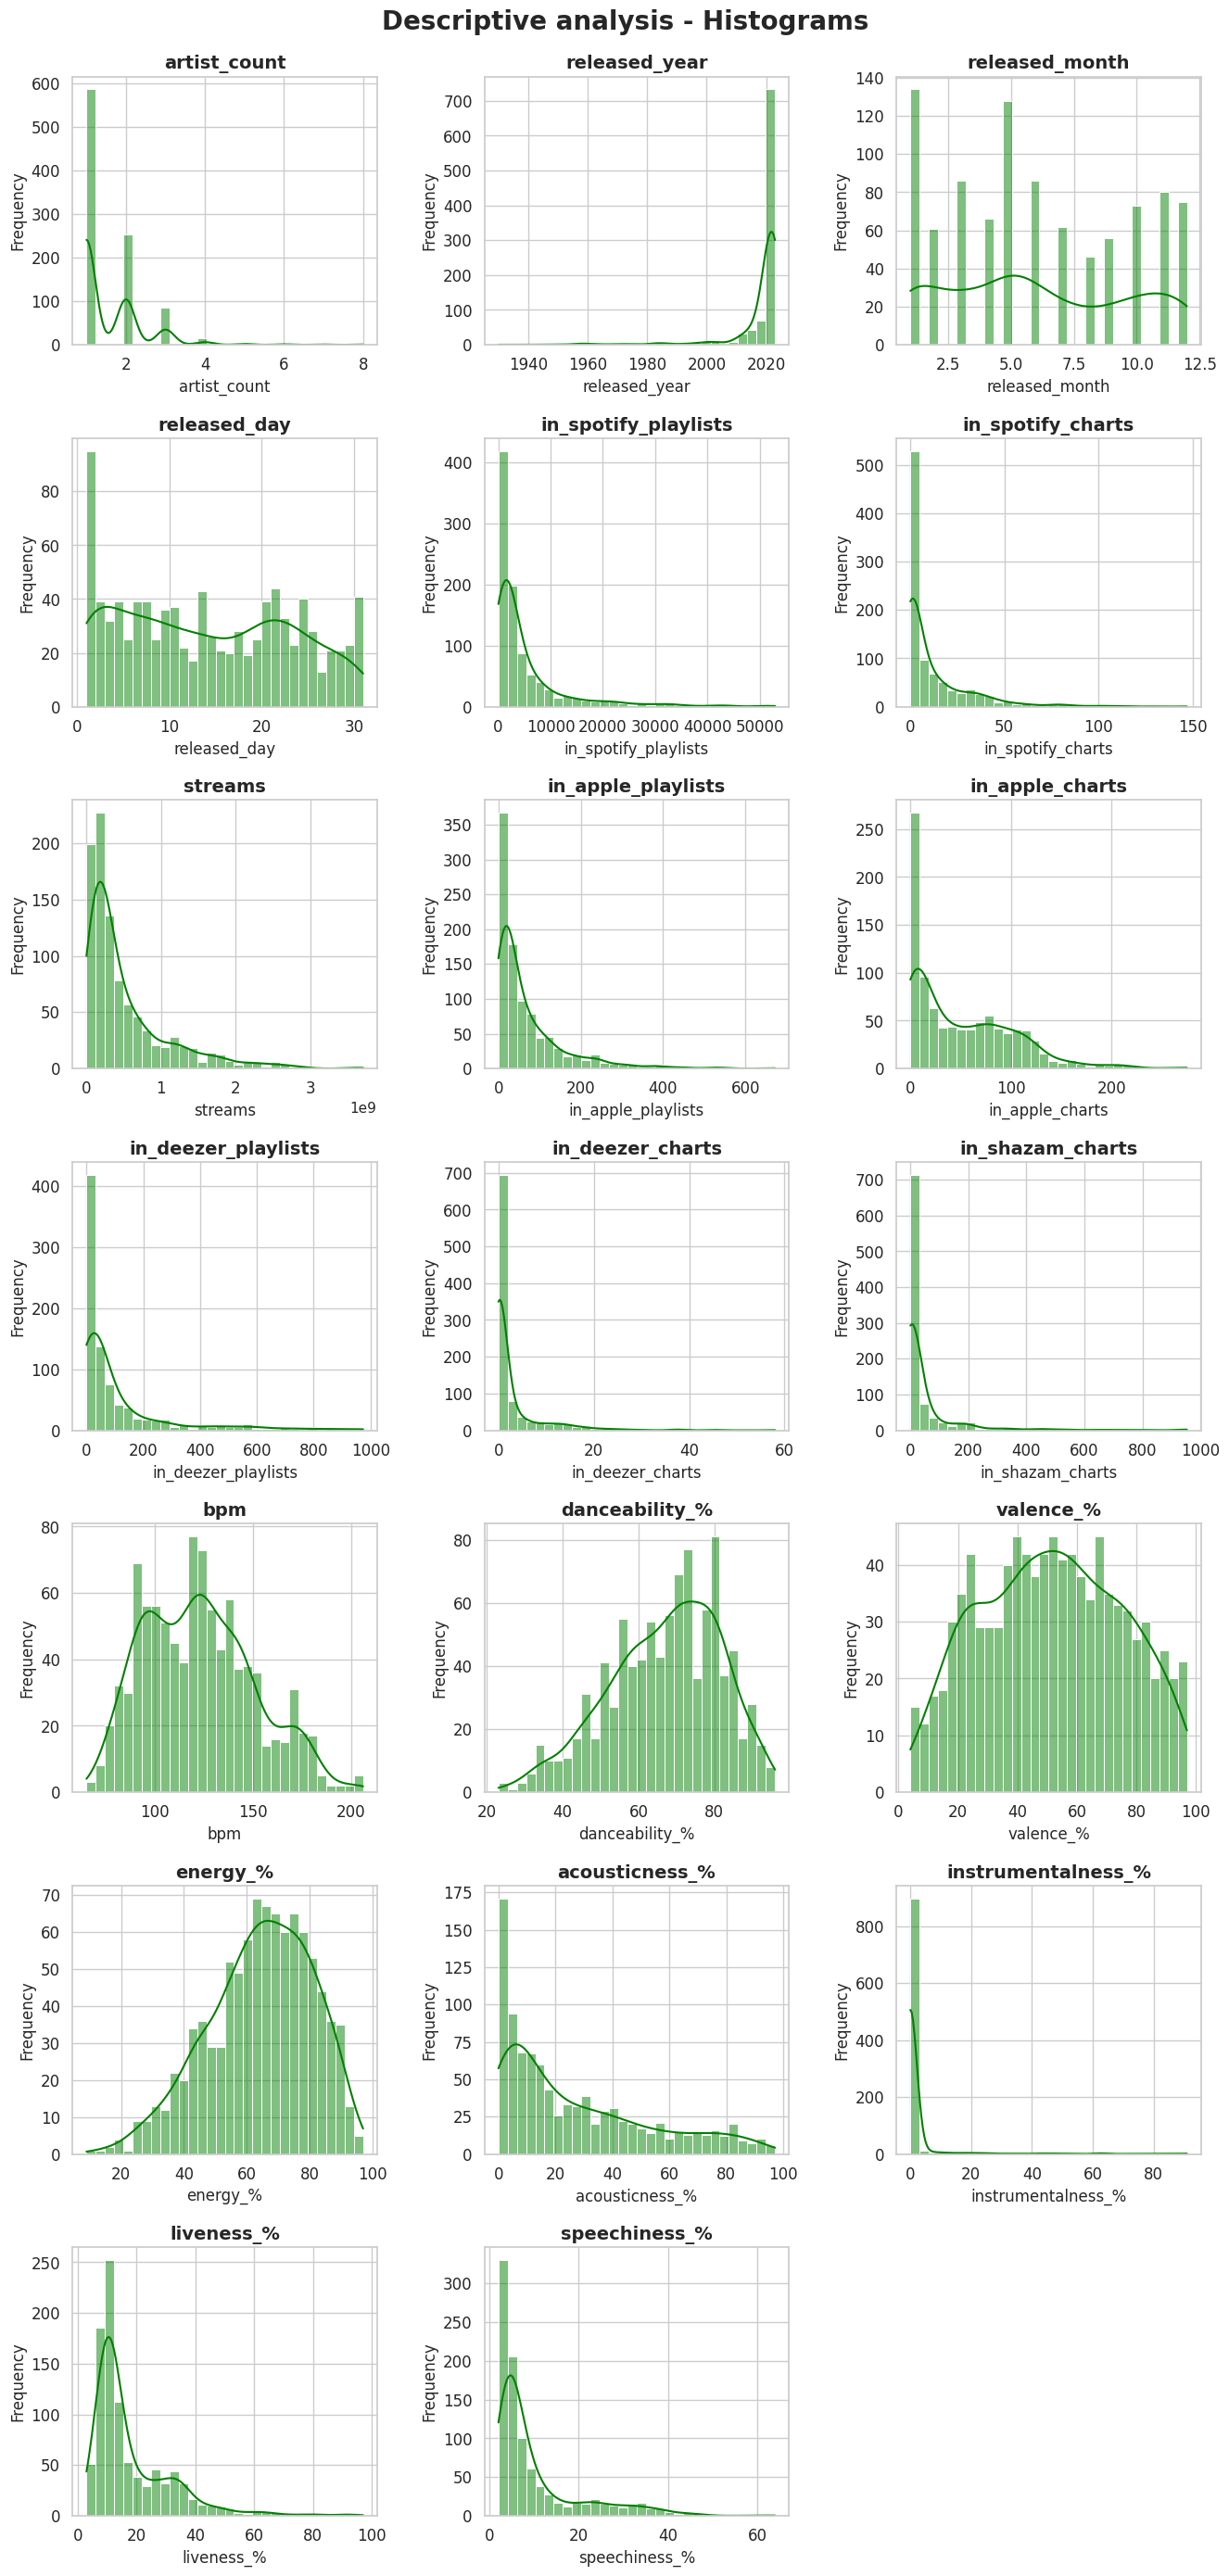

In [75]:
histograms_var_num(df)

In [76]:
# selecting the 10 most listened to songs
top_10_most_listened_to_songs = df.sort_values(by='streams', ascending=False).reset_index(drop=True).head(10)
top_10_most_listened_to_songs.index = top_10_most_listened_to_songs.index + 1
top_10_most_listened_to_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
1,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,2019-11-29
2,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,2017-01-06
3,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2018-11-08
4,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2019-05-10
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2018-10-09
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2016-04-04
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2021-07-09
8,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2017-01-31
9,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,G#,Major,75,64,52,41,0,11,3,2016-05-31
10,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,G,Major,68,49,59,16,0,13,28,2016-09-21


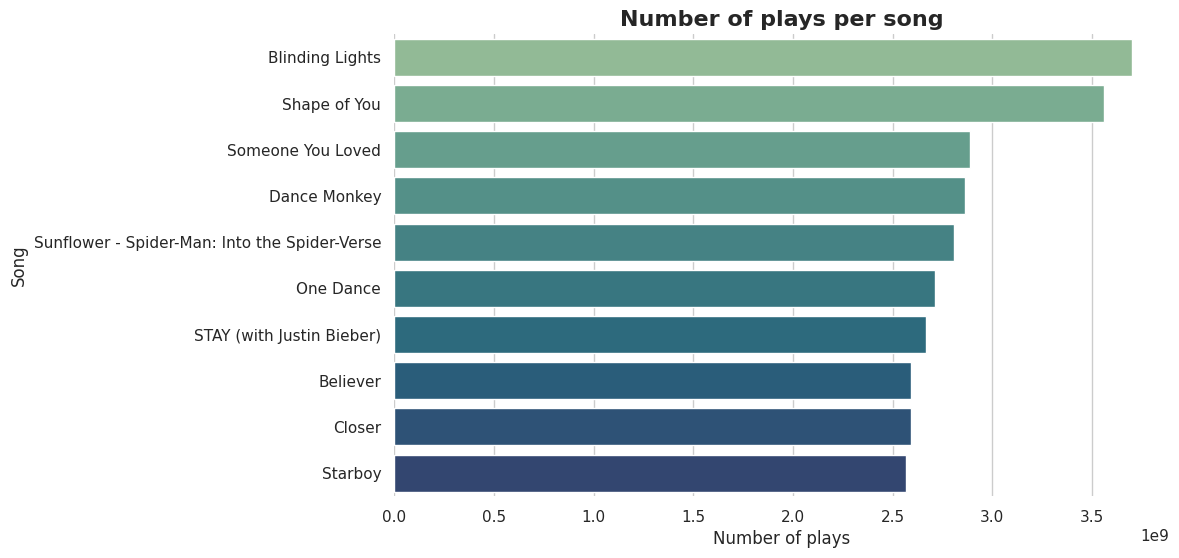

In [77]:
# plotting a bar graph of the top 10 most listened to songs
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_most_listened_to_songs, x='streams', y='track_name', palette='crest')

plt.title('Number of plays per song', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Number of plays',fontsize=12)
plt.ylabel('Song', fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()

In [78]:
# selecting the 10 most listened to artists
top_10_artists = df.groupby('artist(s)_name', as_index=False)['streams'].sum().sort_values(by= 'streams', ascending=False).reset_index(drop=True).head(10)
top_10_artists.index = top_10_artists.index + 1
top_10_artists

,artist(s)_name,streams
1,The Weeknd,14185552870
2,Taylor Swift,14053658300
3,Ed Sheeran,13908947204
4,Harry Styles,11608645649
5,Bad Bunny,9997799607
6,Olivia Rodrigo,7442148916
7,Eminem,6183805596
8,Bruno Mars,5846920599
9,Arctic Monkeys,5569806731
10,Imagine Dragons,5272484650


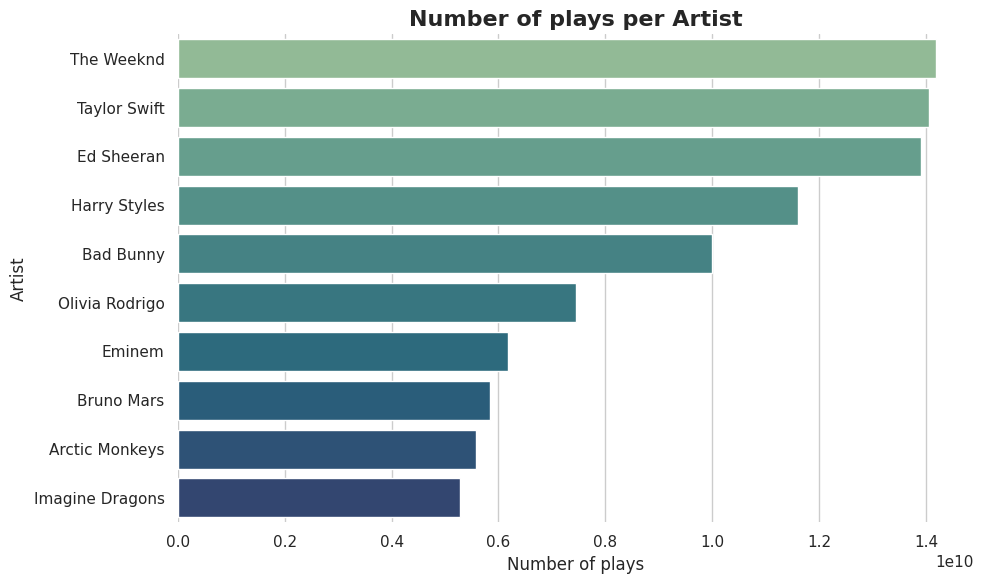

In [79]:
# plotting a bar chart of the top 10 most listened to artists
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_artists, x='streams', y='artist(s)_name', palette='crest')

plt.xticks(rotation=0)
plt.title('Number of plays per Artist', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Number of plays',fontsize=12)
plt.ylabel('Artist', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [80]:
# selecting the top 10 artists with the most songs
top_10_artists_with_the_most_songs = df.groupby('artist(s)_name', as_index=False)['track_name'].count().sort_values(by='track_name', ascending=False).reset_index(drop=True).head(10)
top_10_artists_with_the_most_songs.rename(columns={'track_name': 'qtd_total_songs'}, inplace=True)
top_10_artists_with_the_most_songs.index = top_10_artists_with_the_most_songs.index + 1
top_10_artists_with_the_most_songs

,artist(s)_name,qtd_total_songs
1,Taylor Swift,34
2,The Weeknd,22
3,SZA,19
4,Bad Bunny,19
5,Harry Styles,17
6,Kendrick Lamar,12
7,Morgan Wallen,11
8,Ed Sheeran,9
9,"Drake, 21 Savage",8
10,BTS,8


In [81]:
# selecting the top 10 songs in spotify playlists
top_10_songs_in_spotify_playlists = df.sort_values(by='in_spotify_playlists', ascending=False).reset_index(drop=True).head(10)
top_10_songs_in_spotify_playlists.index = top_10_songs_in_spotify_playlists.index + 1
top_10_songs_in_spotify_playlists

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
1,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,...,F#,Minor,79,87,81,4,0,10,4,2013-01-01
2,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,306,...,C#,Major,35,24,93,0,0,10,8,2003-09-23
3,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,...,D,Major,53,66,78,0,0,16,5,2013-01-01
4,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,265,...,C#,Major,52,73,91,0,0,11,7,1991-09-10
5,Take On Me,a-ha,1,1984,10,19,44927,17,1479115056,34,...,F#,Minor,57,86,90,2,0,9,5,1984-10-19
6,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,2019-11-29
7,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2016-04-04
8,Somebody That I Used To Know,"Gotye, Kimbra",2,2011,1,1,42798,0,1457139296,217,...,NA,Major,86,75,52,54,0,10,4,2011-01-01
9,Everybody Wants To Rule The World,Tears For Fears,1,1985,2,17,41751,25,1205951614,101,...,G,Major,64,54,81,36,0,11,6,1985-02-17
10,Sweet Child O' Mine,Guns N' Roses,1,1987,1,1,41231,1,1553497987,228,...,F#,Major,45,67,90,9,11,10,5,1987-01-01


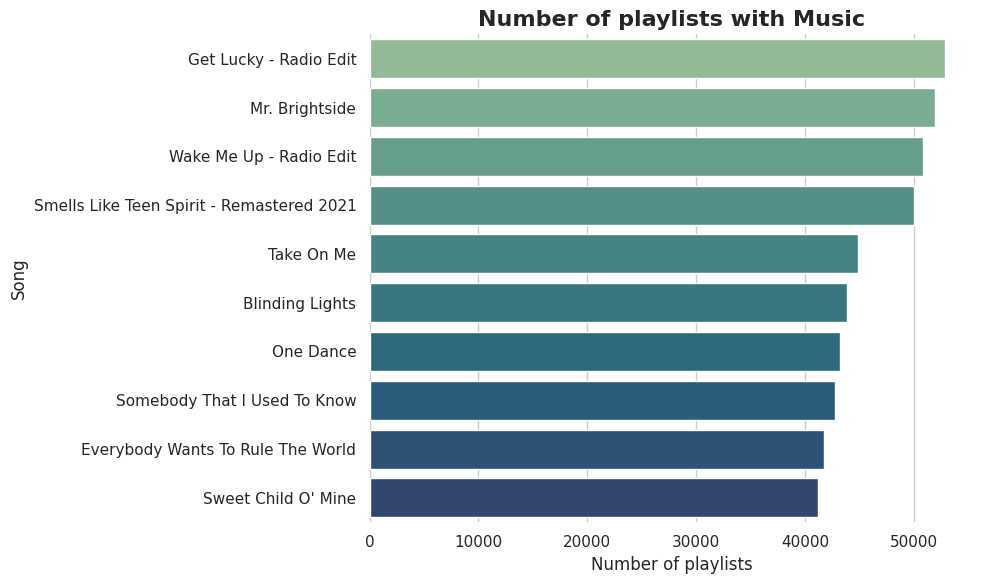

In [82]:
# plotting a graph with the top 10 songs in spotify playlists
plt.figure(figsize=(10, 6))
sns.barplot(data= top_10_songs_in_spotify_playlists, x='in_spotify_playlists', y='track_name', palette='crest')

plt.xticks(rotation=0)
plt.title('Number of playlists with Music', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Number of playlists',fontsize=12)
plt.ylabel('Song', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

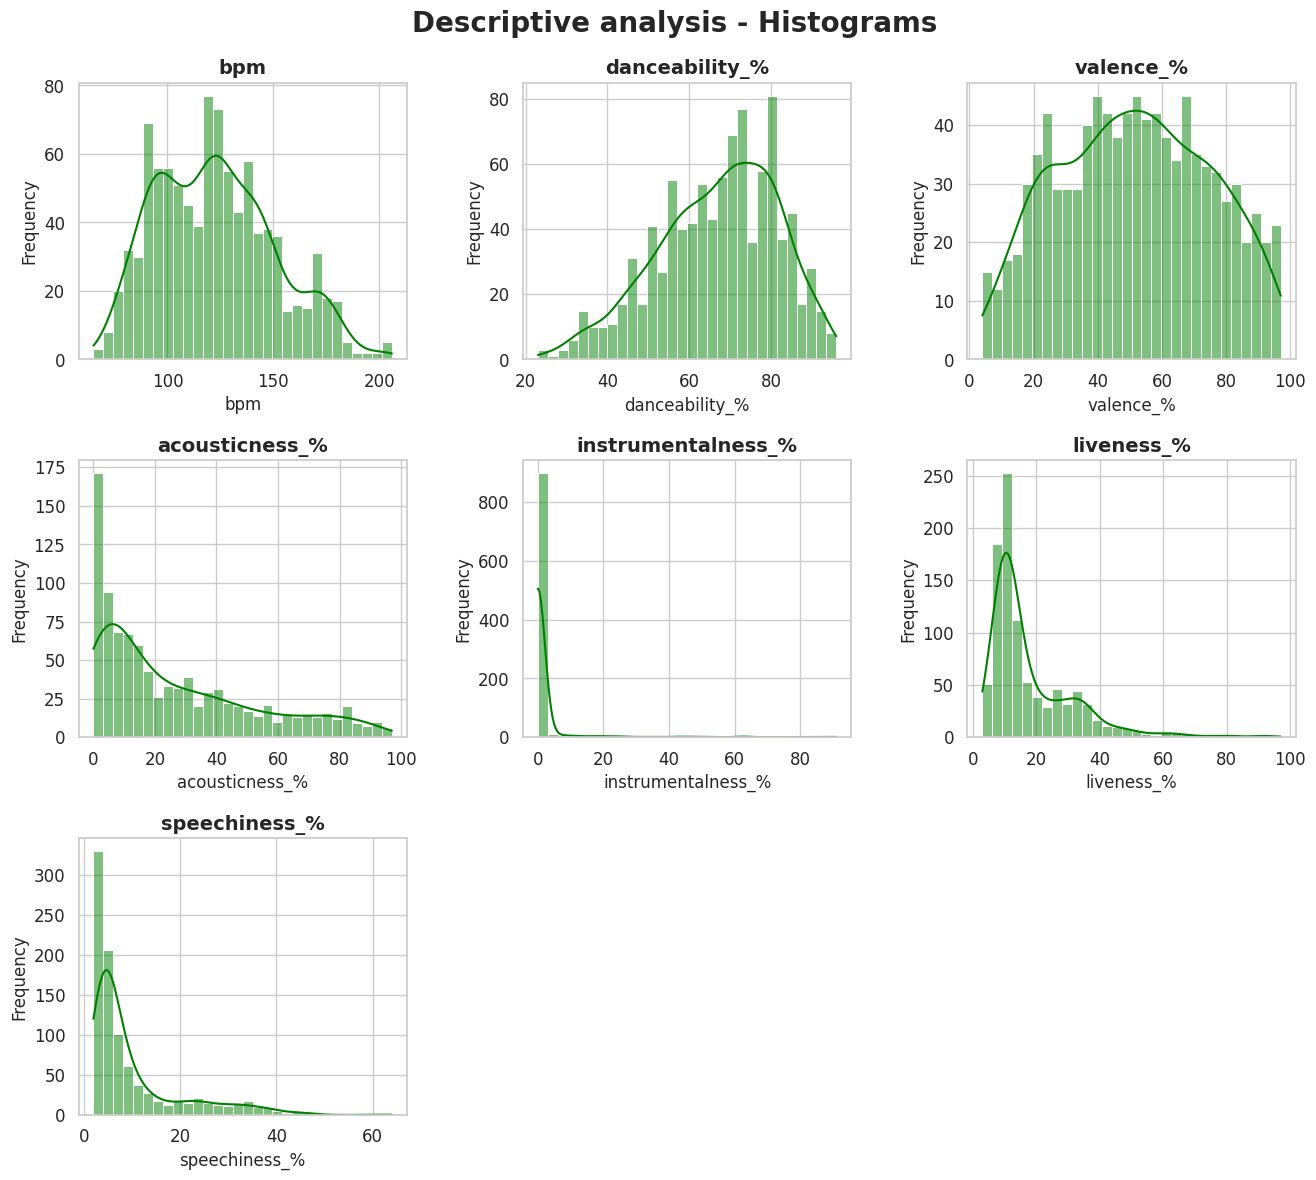

In [83]:
# separating the columns we want to analyze
column_attributes = df[['bpm','danceability_%','valence_%','acousticness_%',
           'instrumentalness_%','liveness_%','speechiness_%']]

# plotting the histograms of these columns
histograms_var_num(column_attributes)

In [84]:
# organizing the df by most listened to songs
df_most_listened_to_songs = df.sort_values(by='streams', ascending=False).reset_index(drop=True)
df_most_listened_to_songs.index = df_most_listened_to_songs.index + 1
df_most_listened_to_songs.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
1,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,2019-11-29
2,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,2017-01-06
3,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2018-11-08
4,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2019-05-10
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2018-10-09
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2016-04-04
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2021-07-09
8,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2017-01-31
9,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,G#,Major,75,64,52,41,0,11,3,2016-05-31
10,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,G,Major,68,49,59,16,0,13,28,2016-09-21


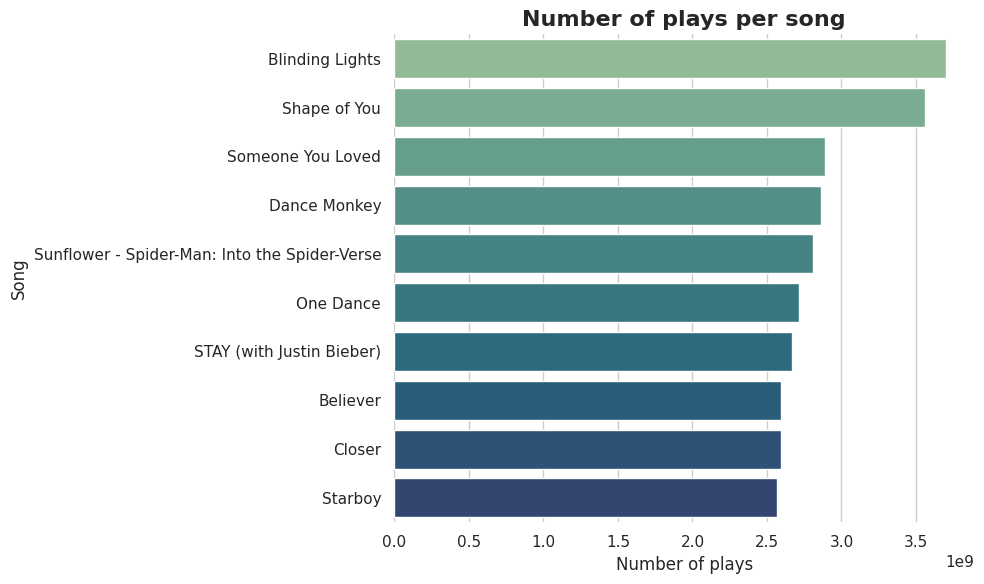

In [85]:
# plotting a graph with the top 10 songs in spotify playlists
plt.figure(figsize=(10, 6))
sns.barplot(data= top_10_most_listened_to_songs, x='streams', y='track_name', palette='crest')

plt.xticks(rotation=0)
plt.title('Number of plays per song', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Number of plays',fontsize=12)
plt.ylabel('Song', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [86]:
# creating a column to indicate whether the song is in the top 100 or not
df_most_listened_to_songs['top_100'] = 0
df_most_listened_to_songs.loc[:100, 'top_100'] = 1

In [87]:
df_most_listened_to_songs.tail(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,top_100
944,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206,3,...,Minor,50,67,89,0,0,19,8,2023-07-07,0
945,New Jeans,NewJeans,1,2023,7,7,77,35,29562220,8,...,Minor,81,53,72,51,0,12,5,2023-07-07,0
946,Danger (Spider) (Offset & JID),"Offset, JID",2,2023,6,2,214,0,24975653,3,...,Major,83,25,69,4,0,23,12,2023-06-02,0
947,Rush,Troye Sivan,1,2023,7,13,864,78,22581161,71,...,Minor,74,35,84,0,0,11,6,2023-07-13,0
948,S91,Karol G,1,2023,7,14,525,41,16011326,34,...,Minor,86,42,72,59,0,9,19,2023-07-14,0
949,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,...,Major,56,48,73,0,0,35,4,2023-07-14,0
950,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,Minor,93,68,65,42,0,12,25,2023-06-01,0
951,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,...,Major,79,92,89,5,0,6,5,2023-07-13,0
952,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,...,Major,82,62,74,10,0,33,7,2022-12-22,0
953,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2762,21,...,Major,49,78,64,19,0,11,4,2022-12-09,0


In [88]:
df_most_listened_to_songs['top_100'].value_counts()

,count
top_100,
0,853
1,100


In [89]:
df_top_100 = df_most_listened_to_songs[df_most_listened_to_songs['top_100'] == 1]
df_top_100.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,top_100
1,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,Major,50,38,80,0,0,9,7,2019-11-29,1
2,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,Minor,83,93,65,58,0,9,8,2017-01-06,1
3,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,Major,50,45,41,75,0,11,3,2018-11-08,1
4,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,Minor,82,54,59,69,0,18,10,2019-05-10,1
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,Major,76,91,50,54,0,7,5,2018-10-09,1
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,Major,77,36,63,1,0,36,5,2016-04-04,1
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,Major,59,48,76,4,0,10,5,2021-07-09,1
8,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,Minor,77,74,78,4,0,23,11,2017-01-31,1
9,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,Major,75,64,52,41,0,11,3,2016-05-31,1
10,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,Major,68,49,59,16,0,13,28,2016-09-21,1


In [90]:
releases_by_year = df_top_100.groupby(df_top_100['release_date'].dt.year).size().reset_index(name='amount')
releases_by_year

,release_date,amount
0,1975,2
1,1983,1
2,1984,1
3,1987,1
4,1991,1
5,1994,1
6,1995,1
7,1998,1
8,1999,1
9,2000,2


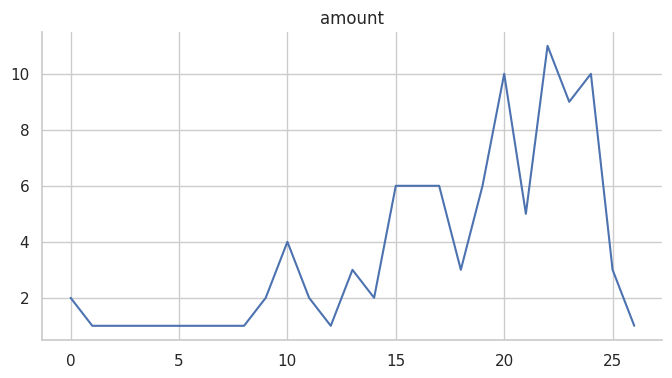

In [91]:
# @title amount

from matplotlib import pyplot as plt
releases_by_year['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

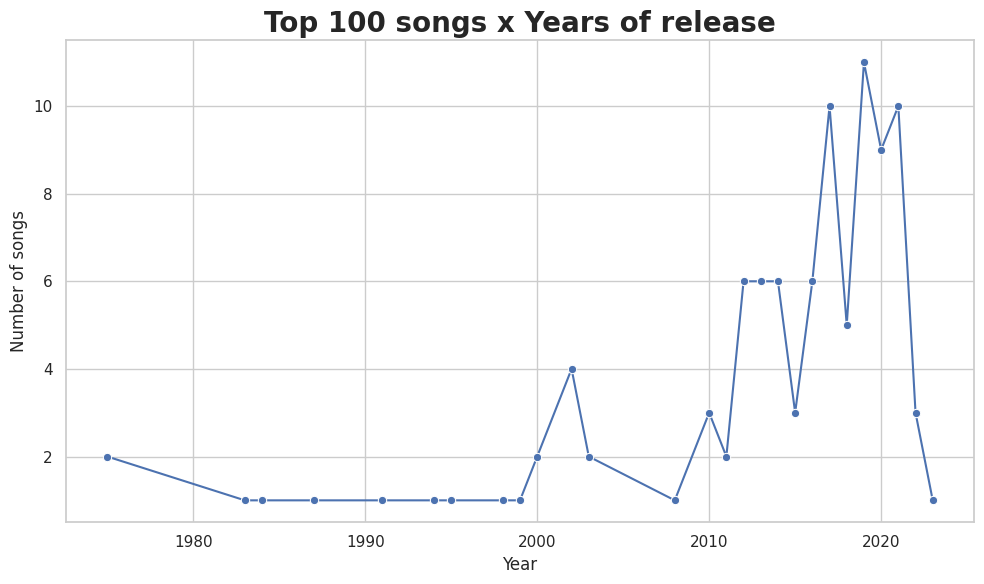

In [92]:
# plotting the number of songs released per year considering the top 100 songs
plt.figure(figsize=(10, 6))
sns.lineplot(data = releases_by_year, x='release_date', y='amount', marker='o')


"""
# Add the number at each point
for x, y in zip(releases_by_year.release_date, releases_by_year.amount):
plt.text(x, y + 0.1, str(y), ha='center', va='bottom', fontsize=9)
"""

plt.title('Top 100 songs x Years of release', fontsize=20, fontweight='bold', y=1.00)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of songs', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


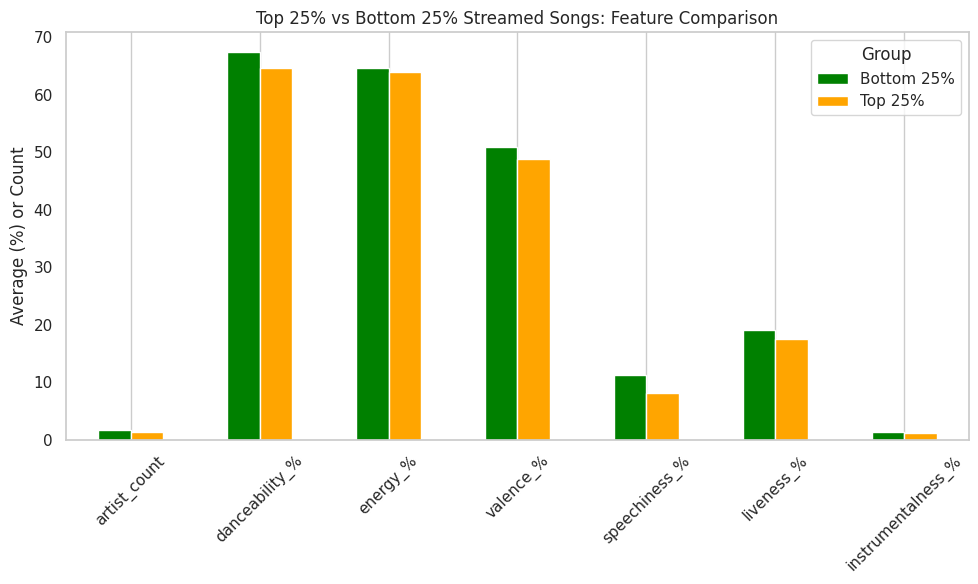

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (make sure 'spotify-2023.csv' is uploaded in Colab)
# df = pd.read_csv("spotify-2023.csv", encoding='latin1')

# Clean necessary columns
df['streams'] = df['streams'].astype(str).str.replace(',', '').astype(float)
df['artist_count'] = df['artist(s)_name'].str.count(',') + 1

# Drop rows with missing values in key columns
df = df.dropna(subset=['streams', 'danceability_%', 'energy_%', 'valence_%'])

# Create Top and Bottom 25% groups
q1 = df['streams'].quantile(0.25)
q3 = df['streams'].quantile(0.75)
df['group'] = df['streams'].apply(lambda x: 'Top 25%' if x >= q3 else ('Bottom 25%' if x <= q1 else 'Middle'))

# Calculate averages
features = ['artist_count', 'danceability_%', 'energy_%', 'valence_%', 'speechiness_%', 'liveness_%', 'instrumentalness_%']
avg_data = df[df['group'].isin(['Top 25%', 'Bottom 25%'])].groupby('group')[features].mean().T

# Plot
avg_data.plot(kind='bar', figsize=(10, 6), color=['green', 'orange'])
plt.title("Top 25% vs Bottom 25% Streamed Songs: Feature Comparison")
plt.ylabel("Average (%) or Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Group')
plt.show()